In [1]:
import os
import zipfile
import urllib.request
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from google.colab import files

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,BatchNormalization

In [2]:
pip install tensorflow


In [3]:
# URL of the dataset
url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"
output_zip = "kagglecatsanddogs_5340.zip"

In [4]:
# Download the dataset
urllib.request.urlretrieve(url, output_zip)

# Unzip the dataset
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall("cats_and_dogs")

# Check the extracted files
os.listdir("cats_and_dogs")

['CDLA-Permissive-2.0.pdf', 'readme[1].txt', 'PetImages']

In [5]:
print("Extracted folders:", os.listdir("cats_and_dogs"))


Extracted folders: ['CDLA-Permissive-2.0.pdf', 'readme[1].txt', 'PetImages']


In [6]:
# Set the paths
base_dir = 'cats_and_dogs/PetImages'
cats_dir = os.path.join(base_dir, 'Cat')
dogs_dir = os.path.join(base_dir, 'Dog')

In [7]:
# Check the number of images in each category
print("Number of cat images:", len(os.listdir(cats_dir)))
print("Number of dog images:", len(os.listdir(dogs_dir)))


Number of cat images: 12501
Number of dog images: 12501


In [8]:
def remove_corrupted_images(folder):
    num_skipped = 0
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            img = tf.keras.preprocessing.image.load_img(file_path)
        except Exception as e:
            num_skipped += 1
            os.remove(file_path)
    print(f"Deleted {num_skipped} corrupted images from {folder}")

remove_corrupted_images(cats_dir)
remove_corrupted_images(dogs_dir)

Deleted 2 corrupted images from cats_and_dogs/PetImages/Cat


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Deleted 2 corrupted images from cats_and_dogs/PetImages/Dog


In [9]:
# Data preprocessing
img_height,img_width = 150, 150
batch_size = 32

In [10]:
# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range = 0.2,
     zoom_range = 0.2,
     horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

print("Training set size:", train_generator.samples)
print("Validation set size:", validation_generator.samples)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Training set size: 20000
Validation set size: 4998


In [11]:
model=Sequential([

    Conv2D(32,(3,3),activation="relu",input_shape=(img_height,img_width,3)),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.2) ,

    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.2),

    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.2),

    Conv2D(256,(3,3),activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.2),

    Conv2D(512,(3,3),activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),

    Dense(512,activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1,activation="sigmoid"),

])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0

In [12]:
epochs=23
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples// batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size,
    epochs=epochs
)

Epoch 1/23
625/625 [==============================] - 194s 287ms/step - loss: 0.6759 - accuracy: 0.6503 - val_loss: 0.6977 - val_accuracy: 0.6116
Epoch 2/23
625/625 [==============================] - 167s 267ms/step - loss: 0.5091 - accuracy: 0.7527 - val_loss: 0.4827 - val_accuracy: 0.7708
Epoch 3/23
625/625 [==============================] - 179s 286ms/step - loss: 0.4141 - accuracy: 0.8072 - val_loss: 0.6223 - val_accuracy: 0.6855
Epoch 4/23
625/625 [==============================] - 173s 277ms/step - loss: 0.3500 - accuracy: 0.8454 - val_loss: 0.6085 - val_accuracy: 0.7490
Epoch 5/23
625/625 [==============================] - 181s 289ms/step - loss: 0.2987 - accuracy: 0.8712 - val_loss: 0.2894 - val_accuracy: 0.8720
Epoch 6/23
625/625 [==============================] - 180s 288ms/step - loss: 0.2661 - accuracy: 0.8870 - val_loss: 0.5707 - val_accuracy: 0.7849
Epoch 7/23
625/625 [==============================] - 181s 290ms/step - loss: 0.2442 - accuracy: 0.8961 - val_loss: 0.2866 -

In [13]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
loss,accuracy=model.evaluate(validation_generator,steps=validation_generator.samples//batch_size)
print(f"validation accuracy:{accuracy * 100:.2f}")

156/156 [==============================] - 37s 238ms/step - loss: 0.1612 - accuracy: 0.9351
validation accuracy:93.51


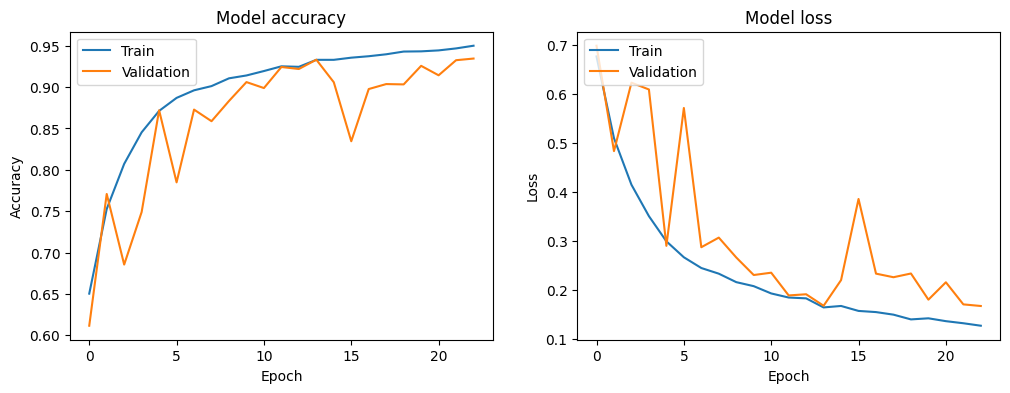

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
